Throughout this notebook I will analyze literacy data for different districts. This will be done using the normal distribution to model the data. I will also compute z-scores to find any outliers in our data. 

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
#import data and drop any missing values
education_districtwise = pd.read_csv('education_districtwise.csv')
education_districtwise = education_districtwise.dropna()

### Plot a histogram

Now I will model the data with a histogram. This will help visualize the shape of the data and determine if it resembles the shape of a specific distribution. 

In [4]:
education_districtwise.head(5)

DISTNAME STATNAME  BLOCKS  VILLAGES  CLUSTERS  TOTPOPULAT  OVERALL_LI
0   DISTRICT32   STATE1      13       391       104    875564.0       66.92
1  DISTRICT649   STATE1      18       678       144   1015503.0       66.93
2  DISTRICT229   STATE1       8        94        65   1269751.0       71.21
3  DISTRICT259   STATE1      13       523       104    735753.0       57.98
4  DISTRICT486   STATE1       8       359        64    570060.0       65.00

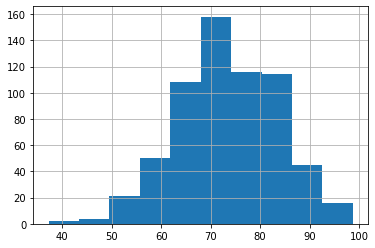

In [3]:
#histogram of the district literacy rate data, OVERALL_LI column
education_districtwise['OVERALL_LI'].hist()

Looking at the shape of the histogram you can see that the distribution of the literacy rate data is bell-shaped and symmetric about the mean. The mean literacy rate seems to be around 73%, which is located in the center of the plot. The shape of the histogram suggests that the normal distribution could be a good choice for modeling the data.

### Evaluation

Since the normal distribution seems like a good fit for the district literacy rate data, I can expect the empirical rule to apply to the data.


First, I will name two new variables to store the values for the mean and standard deviation of the district literacy rate: `mean_overall_li` and `std_overall_li`. 

In [4]:
mean_overall_li = education_districtwise['OVERALL_LI'].mean()
mean_overall_li

73.39518927444797

The mean district literacy rate is about 73.4%.

In [5]:
std_overall_li = education_districtwise['OVERALL_LI'].std()
std_overall_li

10.098460413782469

The standard deviation is about 10%.

I am going to compute the actual percentage of district literacy rates that fall within +/- 1 SD from the mean by fidning the upper and lower limits using the mean and the SD. I expect this value to be about 68% since it should follow the empirical rule.

To check this, I will find the mean amount of values that fall above and below the lower and upper limit.

In [6]:
lower_limit = mean_overall_li - 1 * std_overall_li
upper_limit = mean_overall_li + 1 * std_overall_li
((education_districtwise['OVERALL_LI'] >= lower_limit) & (education_districtwise['OVERALL_LI'] <= upper_limit)).mean()

0.6640378548895899

This shows that 66.4% of values fall within 1 SD of the mean, which is good since we exptected 68%. Now +/- 2 SD from the mean.

In [7]:
lower_limit = mean_overall_li - 2 * std_overall_li
upper_limit = mean_overall_li + 2 * std_overall_li
((education_districtwise['OVERALL_LI'] >= lower_limit) & (education_districtwise['OVERALL_LI'] <= upper_limit)).mean()

0.9542586750788643

95.4% fall within 2 SD of the mean, which is very close to what was expected. Now +/- 3 SD from the mean.

In [8]:
lower_limit = mean_overall_li - 3 * std_overall_li
upper_limit = mean_overall_li + 3 * std_overall_li
((education_districtwise['OVERALL_LI'] >= lower_limit) & (education_districtwise['OVERALL_LI'] <= upper_limit)).mean()

0.9968454258675079

Now we can see that all values follow the empirical rule, and can confidently say that the data follows the normal distribution.

Found alues: 66.4%, 95.4%, and 99.6% are very close to the expected values
Values the empirical rule suggests: roughly 68%, 95%, and 99.7%.


### Compute z-scores

I want to find the Z-score to find any outliers, which is any number outside of  +- 3 STD.

I will create a column for Zscore, calculated using SciPy.

In [9]:
#use stats.zscore() on the OVERALL_LI column
education_districtwise['Z_SCORE'] = stats.zscore(education_districtwise['OVERALL_LI'])
education_districtwise

DISTNAME STATNAME  BLOCKS  VILLAGES  CLUSTERS  TOTPOPULAT  OVERALL_LI  \
0     DISTRICT32   STATE1      13       391       104    875564.0       66.92   
1    DISTRICT649   STATE1      18       678       144   1015503.0       66.93   
2    DISTRICT229   STATE1       8        94        65   1269751.0       71.21   
3    DISTRICT259   STATE1      13       523       104    735753.0       57.98   
4    DISTRICT486   STATE1       8       359        64    570060.0       65.00   
..           ...      ...     ...       ...       ...         ...         ...   
675  DISTRICT522  STATE29      37       876       137   5296396.0       78.05   
676  DISTRICT498  STATE29      64      1458       230   4042191.0       56.06   
677  DISTRICT343  STATE29      59      1117       216   3483648.0       65.05   
678  DISTRICT130  STATE29      51       993       211   3522644.0       66.16   
679  DISTRICT341  STATE29      41       783       185   2798214.0       65.46   

      Z_SCORE  
0   -0.641712  
1   -0.640721  
2   -0.216559  
3   -1.527694  
4   -0.831990  
..        ...  
675  0.461307  
676 -1.717972  
677 -0.827035  
678 -0.717030  
679 -0.786403  

[634 rows x 8 columns]

Now I want to indentify the outliers by finding any rows with a Z score greater than +- 3. I will do this by creating a mask for each Z score, >3 and <-3, and using the logical OR operator ( | ) 

In [10]:
education_districtwise[(education_districtwise['Z_SCORE'] > 3) | (education_districtwise['Z_SCORE'] < -3)]

DISTNAME STATNAME  BLOCKS  VILLAGES  CLUSTERS  TOTPOPULAT  OVERALL_LI  \
434  DISTRICT461  STATE31       4       360        53    532791.0       42.67   
494  DISTRICT429  STATE22       6       612        62    728677.0       37.22   

      Z_SCORE  
434 -3.044964  
494 -3.585076

Using z-scores, I identify two outlying districts that have unusually low literacy rates: `DISTRICT461` and `DISTRICT429`. The literacy rates in these two districts are more than 3 SDs *below* the  overall mean literacy rate. 